Sample--> y_true = (0.75 * x_data) + 5 + noise

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x_data = np.linspace(0.0,10.0,1000000)

In [3]:
noise = np.random.randn(len(x_data))

In [4]:
y_true = (0.75 * x_data) + 5 + noise

In [5]:
my_data = pd.concat([pd.DataFrame(data=x_data,columns=['X Data']),pd.DataFrame(data=y_true,columns=['Y'])],axis=1)

<AxesSubplot:xlabel='X Data', ylabel='Y'>

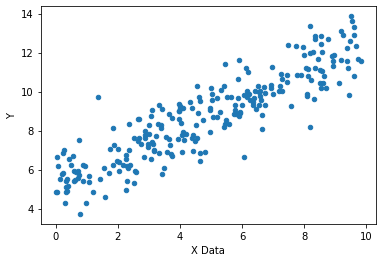

In [6]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y = 'Y')

In [7]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


Instructions for updating:
non-resource variables are not supported in the long term


In [8]:
m = tf.Variable(tf.ones([1],tf.float32))
b = tf.Variable(tf.ones([1],tf.float32))

In [9]:
xph = tf.placeholder(tf.float32,[10])
yph = tf.placeholder(tf.float32,[10])

In [10]:
y = m * xph + b

In [11]:
error = tf.reduce_sum(tf.square(y-yph))

In [12]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [13]:
init = tf.global_variables_initializer()

In [14]:
saver = tf.train.Saver()

In [15]:
with tf.Session() as sess:
    
    sess.run(init)
    
    epoch = 1000
    
    for i in range(epoch):
        rand_ind = np.random.randint(len(x_data),size=10)
        
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict=feed)
        
    model_m,model_b = sess.run([m,b])
    
    #เซฟโมเดล
    saver.save(sess,'models/model.ckpt')
        
    

In [16]:
model_m


array([0.84654945], dtype=float32)

In [17]:
model_b

array([4.946721], dtype=float32)

In [30]:
# ดึงเอาโมเดลที่เซฟไว้ออกมาดู
with tf.Session() as sess:
    saver.restore(sess,'models/model.ckpt')
    
    restored_m ,restored_b = sess.run([m,b]) 
    
    #เลือกตัวเเปร restore_m,restore_b 
    #โดยที่ออกมาจาก session ที่เรา restore ออกมาก็คือ m เเละ b'''

INFO:tensorflow:Restoring parameters from models/model.ckpt


In [27]:
restored_m #ตัวที่เราเลือกออกมา

array([0.84654945], dtype=float32)

In [28]:
restored_b #ตัวที่เราเลือกออกมา

array([4.946721], dtype=float32)

In [21]:
with tf.Session() as sess:
    
    #โหลดโมเดลเก่ามาเทรนต่อ
    saver.restore(sess,'models/model.ckpt')
    
    
    #เราจะต้องลงคำสั่ง sess.run(init) ออกเพราะเราสามารถนำมาเทรนต่อได้เลย
    epoch = 1000
    
    for i in range(epoch):
        rand_ind = np.random.randint(len(x_data),size=10)
        
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict=feed)
        
    model_m,model_b = sess.run([m,b])
    
    #เซฟโมเดลโดยที่ทับของเก่า
    saver.save(sess,'models/model.ckpt')
        
    

INFO:tensorflow:Restoring parameters from models/model.ckpt


In [22]:
model_m

array([0.7311205], dtype=float32)

In [23]:
model_b

array([5.011049], dtype=float32)